## This notebook shows how to open HDF5 data files (produced in DD4Hep), and plot hit distributions. Includes a map of the index within the  file to the variables of interest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

import h5py as h5

from IPython.display import display_html 

In [2]:
#Prints Map of Index to Variable in the H5 File
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "120%"),
    ("color", 'black')])]    # the color value can not be None

df1 = pd.DataFrame({'Hit E':[0],'Hit X':[1],'Hit Y':[2],'Hit Z':[3]},index=['Index'])
df2 = pd.DataFrame({'mcPDG':[0], 'mcSimulatorStatus':[1], 'mcGeneratorStatus':[2],'mcPX':[3],
                    'mcPY':[4],'mcPZ':[5],'mcMass':[6],'mcPT':[7],'mcP':[8],'mcTheta':[9]},index=['Index'])
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('[Calorimeter Hit]')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('[Truth Particle]')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

[Calorimeter Hit] Hit E Hit X Hit Y Hit Z 
 
 Index 
 0 
 1 
 2 
 3 
 
 [Truth Particle] mcPDG mcSimulatorStatus mcGeneratorStatus mcPX mcPY mcPZ mcMass mcPT mcP mcTheta 
 
 Index 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9

## Get data

In [3]:
filename = '2M_piplus.hdf5'
h5_file = h5.File(filename,'r')
print(list(h5_file.keys()))

#ecal = h5_file['ecal']
hcal = h5_file['hcal']
mc = h5_file['mc']
ecal = h5_file['hcal']
print(hcal.shape)
print(hcal.chunks) #important for TF batch_size

['hcal', 'mc']
(2000000, 4, 1861)
(100, 4, 1861)


In [4]:
Nevents = 1000
hcal_E = hcal[:Nevents,0]
hcal_X = hcal[:Nevents,1]
hcal_Y = hcal[:Nevents,2]
hcal_Z = hcal[:Nevents,3]

ecal_E = ecal[:Nevents,0]
ecal_X = ecal[:Nevents,1]
ecal_Y = ecal[:Nevents,2]
ecal_Z = ecal[:Nevents,3]
#NOTE: This pulls everything into memory.
#This is OK for small files, but the benefit
#Of hdf5 is the ability to slice the file,
#just as you would a numpy array.

## Hit postion distributions

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


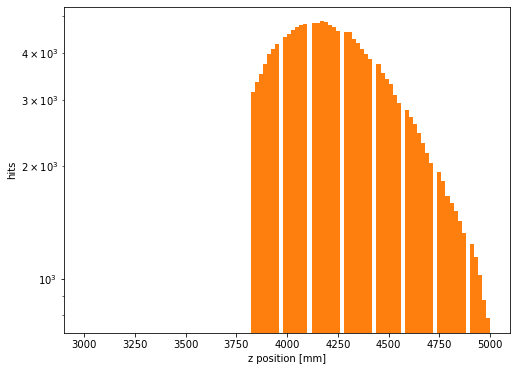

In [5]:
E_index = 0

fig = plt.figure( figsize=(8, 6))

#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60)
#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60)
plt.hist(hcal_Z.flatten(),bins=100, range=(3000,5000),label='HCAL')
plt.hist(ecal_Z.flatten(),bins=100, range=(3000,5000),label='ECAL')
#plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.position.z']),bins=100,range=(3000,5000), label='ECAL')
plt.yscale('log')
plt.xlabel('z position [mm]')
plt.ylabel('hits')
plt.show()

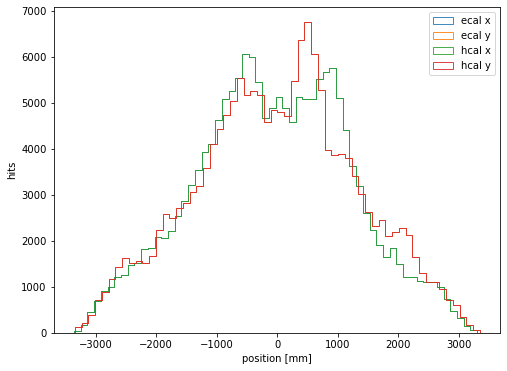

In [6]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ecal_X.flatten(),bins=60,label='ecal x',alpha=0.85,histtype='step')
plt.hist(ecal_Y.flatten(),bins=60, label='ecal y',alpha=0.85,histtype='step')
plt.hist(hcal_X.flatten(),bins=60,label='hcal x',alpha=0.85,histtype='step')
plt.hist(hcal_Y.flatten(),bins=60, label='hcal y',alpha=0.85,histtype='step')
plt.legend()
#plt.yscale('log')
plt.xlabel('position [mm]')
plt.ylabel('hits')
plt.show()

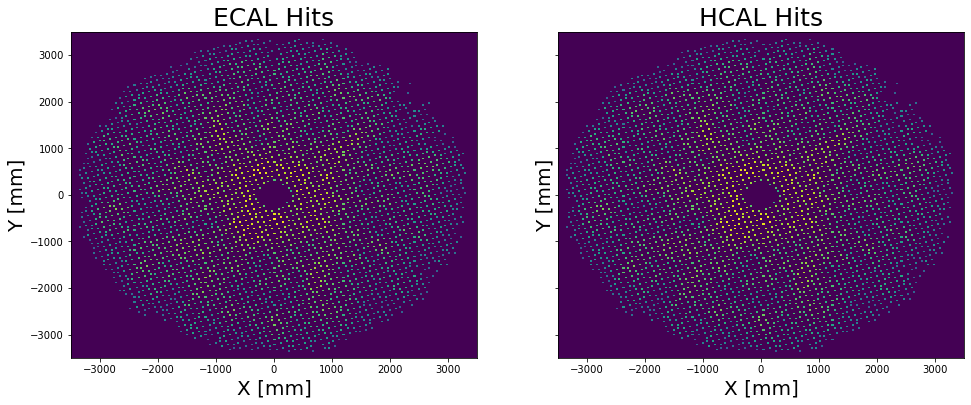

In [7]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ecal_X.flatten()
y = ecal_Y.flatten()
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))
plt.yticks(fontsize=20)
plt.xticks(fontsize=10)

x = hcal_X.flatten()
y = hcal_Y.flatten()
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))

ax[1].set_xlabel("X [mm]",fontsize=20)
ax[1].set_ylabel("Y [mm]",fontsize=20)
ax[1].set_title('HCAL Hits',fontsize=25)
ax[0].set_title('ECAL Hits',fontsize=25)
ax[0].set_xlabel("X [mm]",fontsize=20)
ax[0].set_ylabel("Y [mm]",fontsize=20)

#plt.show()
plt.savefig("cal_XY.pdf")

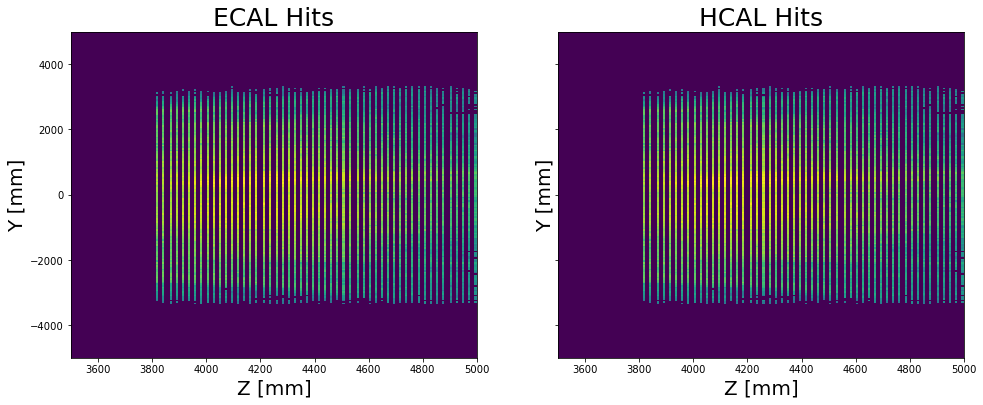

In [9]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
z = ecal_Z.flatten()
y = ecal_Y.flatten()
ax[0].hist2d(np.array(z),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))

z = hcal_Z.flatten()
y = hcal_Y.flatten()
ax[1].hist2d(np.array(z),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))


ax[0].set_xlabel('Z [mm]',fontsize=20)
ax[1].set_xlabel('Z [mm]',fontsize=20)
ax[0].set_ylabel('Y [mm]',fontsize=20)
ax[1].set_ylabel('Y [mm]',fontsize=20)

ax[1].set_title('HCAL Hits',fontsize=25)
ax[0].set_title('ECAL Hits',fontsize=25)

plt.savefig("cal_YZ.pdf")

## Hit energy distributions

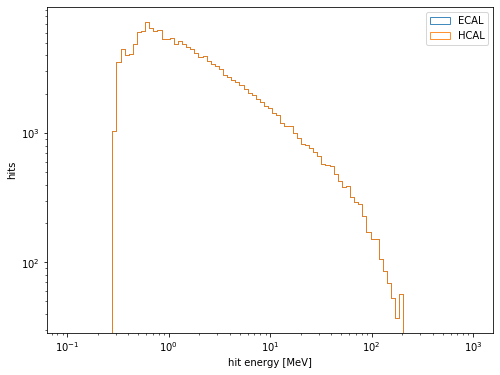

In [10]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ecal_E.flatten(),bins=np.geomspace(0.1,1000,100),label='ECAL',alpha=0.85,histtype='step')
plt.hist(hcal_E.flatten(),bins=np.geomspace(0.1,1000,100), label='HCAL',alpha=0.85,histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('hits')
plt.xlabel('hit energy [MeV]')
plt.show()

In [ ]:
print(np.mean(ecal_E.flatten()))

In [12]:
HCALhits = hcal_E
print(np.shape(hcal_E))
HCAL_total = np.nansum(HCALhits,axis=-1)
HCAL_average = np.nanmean(HCALhits,axis=-1)
HCAL_nhits = np.zeros(np.shape(hcal_E)[0])
for i,event in enumerate(hcal_E):
    HCAL_nhits[i] = np.sum(~np.isnan(event))

print('total HCAL energy' , HCAL_total)
print('Average hit energy in HCAL' , HCAL_average)


ECALhits = ecal_E
ECAL_total = np.nansum(ECALhits,axis=-1)
ECAL_average = np.nanmean(ECALhits,axis=-1)
ECAL_nhits = np.zeros(np.shape(hcal_E)[0])
for i,event in enumerate(ecal_E):
    ECAL_nhits[i] = np.sum(~np.isnan(event))

print('total ECAL energy[MeV]' , ECAL_total)
print('Average hit energy in ECAL [MeV]' , ECAL_average)

(1000, 1861)
total HCAL energy [5.07885742e+02 1.46865234e+03 1.43295898e+03 1.69158325e+03
 2.00097656e+03 5.81890869e+02 1.66551514e+03 8.28900146e+02
 7.40661621e+01 1.08581543e+01 2.81323242e+02 1.32276001e+03
 1.39484863e+03 8.43298340e+02 4.42553711e+02 1.22117920e+03
 5.49884033e+02 1.22778320e+03 1.62794189e+03 2.80017090e+02
 1.31582031e+03 7.77832031e+02 4.48181152e+01 4.34570312e+00
 1.68016968e+03 2.42980957e+01 1.36224365e+03 4.60491943e+02
 5.12347412e+02 1.00298462e+03 1.00054932e+02 1.44034424e+03
 1.10014038e+03 1.60449219e+03 3.52416992e+01 1.50297852e+03
 1.77120361e+03 5.11450195e+02 0.00000000e+00 6.66198730e+01
 3.30987549e+02 3.35937500e+02 1.11849365e+03 2.17932129e+02
 1.05243530e+03 1.24969482e+02 4.04266357e+02 1.27947998e+02
 1.13644409e+03 6.10174561e+02 9.39471436e+02 3.62176514e+02
 1.35996094e+03 8.89697266e+02 6.07720947e+02 1.92427368e+03
 1.88416748e+03 1.33935547e+02 7.06274414e+02 1.58160400e+03
 5.29327393e+02 1.53150635e+03 2.44158936e+02 2.070904

<ipython-input-12-4b49b8845c50>:4: RuntimeWarning: Mean of empty slice
  HCAL_average = np.nanmean(HCALhits,axis=-1)
<ipython-input-12-4b49b8845c50>:15: RuntimeWarning: Mean of empty slice
  ECAL_average = np.nanmean(ECALhits,axis=-1)


Text(0.5, 0, 'Number of Hits')

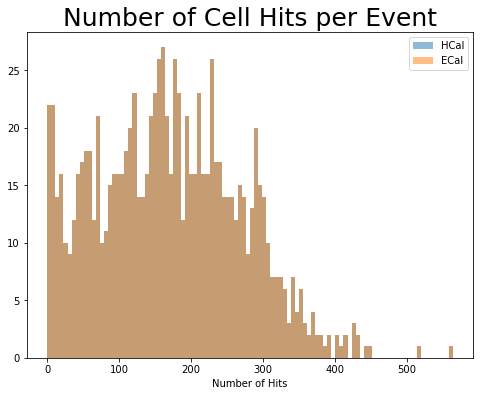

In [13]:
#fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=False,sharey=False)
fig = plt.figure(figsize=(8,6))
plt.title("Number of Cell Hits per Event",fontsize=25)
plt.hist(np.count_nonzero(~np.isnan(hcal_E),axis=1),bins=100,alpha=0.5,label='HCal')
plt.hist(np.count_nonzero(~np.isnan(ecal_E),axis=1),bins=100,alpha=0.5,label='ECal')
plt.legend()
plt.xlabel("Number of Hits")

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


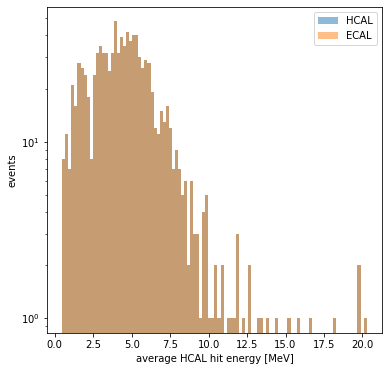

In [14]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_average,bins=100,alpha=0.5,label='HCAL')
plt.hist(ECAL_average,bins=100,alpha=0.5,label='ECAL')

plt.xlabel('average HCAL hit energy [MeV]')
plt.ylabel('events')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


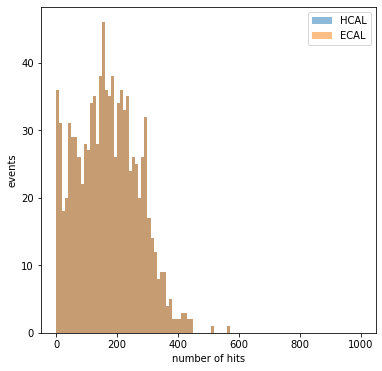

In [15]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='HCAL')
plt.hist(ECAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='ECAL')

plt.xlabel('number of hits')
plt.ylabel('events')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [16]:
px = mc[:,3]
py = mc[:,4]
pz = mc[:,5]
mass = mc[:,6]

p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

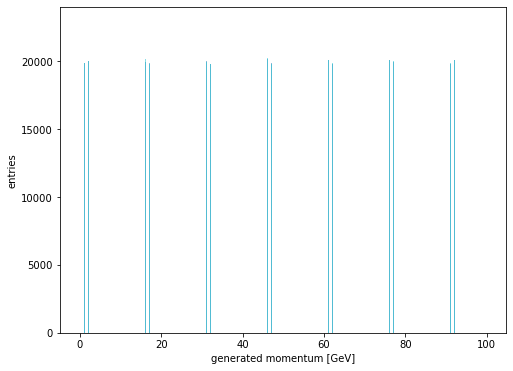

2000000


In [17]:
fig = plt.figure( figsize=(8, 6))

plt.hist(p,range=(0,100),bins=100,alpha=0.5)
plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5)

plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

In [ ]:
print(px)